In [380]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns



In [381]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [382]:
downloaded = drive.CreateFile({'id':'1M0KX-h966dw7etl99YzQBlvoYjjXY2gk'}) # replace the id with id of file you want to access
downloaded.GetContentFile('202007-capitalbikeshare-tripdata.csv') 


In [383]:
#imporing capitalbikeshare-tripdata dataset
data = pd.read_csv("202007-capitalbikeshare-tripdata.csv") 
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,40166AEE48DB264F,docked_bike,2020-07-10 20:00:46,2020-07-10 20:09:42,Potomac Ave & Half St SW,570.0,4th & M St SW,21.0,38.870201,-77.010836,38.87670,-77.017800,casual
1,C2D80D65DEB2C464,docked_bike,2020-07-30 22:11:33,2020-07-30 23:32:05,Maine Ave & 9th St SW,548.0,Maine Ave & 9th St SW,548.0,38.880440,-77.025236,38.88044,-77.025236,casual
2,FBE8E99BAAED0455,electric_bike,2020-07-22 09:47:52,2020-07-22 09:53:38,NaN,NaN,NaN,NaN,38.920000,-77.000000,38.92000,-77.010000,casual
3,E7950C376FD263E4,electric_bike,2020-07-22 10:36:55,2020-07-22 10:49:03,NaN,NaN,NaN,NaN,38.920000,-77.010000,38.92000,-77.000000,casual
4,0149F273572ED43F,electric_bike,2020-07-22 15:53:55,2020-07-22 15:58:47,NaN,NaN,NaN,NaN,38.910000,-77.050000,38.90000,-77.050000,casual


In [384]:
#system requirement and prerequisites
info = pd.read_csv("https://raw.githubusercontent.com/Akanksha0215/mywork/master/system_information.csv") 
info.head()

,data__language,data__system_id,data__timezone,data__operator,data__license_url,data__purchase_url,data__short_name,data__name,data__phone_number,data__start_date,data__url,data__email,last_updated,ttl
0,es,cabi,America/New_York,"Motivate International, Inc.",NaN,https://secure.capitalbikeshare.com/register/,Capital Bikeshare,Capital Bikeshare,1-877-430-BIKE,2010-09-20,http://www.capitalbikeshare.com,customerservice@capitalbikeshare.com,1599426730,5


In [385]:
regions = pd.read_csv("https://raw.githubusercontent.com/Akanksha0215/mywork/master/system_regions.csv") 
regions.head()

,data__regions__region_id,data__regions__name,last_updated,ttl
0,40,"Alexandria, VA",1.599427e+09,5.0
1,41,"Arlington, VA",NaN,NaN
2,42,"Washington, DC",NaN,NaN
3,43,"Montgomery County, MD (North)",NaN,NaN
4,44,"Montgomery County, MD (South)",NaN,NaN


In [386]:
calendar = pd.read_csv("https://raw.githubusercontent.com/Akanksha0215/mywork/master/system_calendar.csv") 
calendar.head()

,data__calendars__start_day,data__calendars__end_day,data__calendars__end_month,data__calendars__start_month,last_updated,ttl
0,1,31,12,1,1599426770,5


In [387]:
hours = pd.read_csv("https://raw.githubusercontent.com/Akanksha0215/mywork/master/system_hours.csv") 
hours.head()

,last_updated,ttl
0,1599426760,5


In [388]:
 #attributes in capitalbikeshare-tripdata dataset
 dt_column = data.columns
 print('Primary Fields in the Bike-Sharing Dataset')
 print(dt_column)

Primary Fields in the Bike-Sharing Dataset
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


In [389]:
#information for Bike-sharing dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228302 entries, 0 to 228301
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             228302 non-null  object 
 1   rideable_type       228302 non-null  object 
 2   started_at          228302 non-null  object 
 3   ended_at            228302 non-null  object 
 4   start_station_name  224382 non-null  object 
 5   start_station_id    224382 non-null  float64
 6   end_station_name    222897 non-null  object 
 7   end_station_id      222897 non-null  float64
 8   start_lat           228301 non-null  float64
 9   start_lng           228301 non-null  float64
 10  end_lat             227414 non-null  float64
 11  end_lng             227414 non-null  float64
 12  member_casual       228302 non-null  object 
dtypes: float64(6), object(7)
memory usage: 22.6+ MB
None


In [390]:
#different ride_id generated while bike ride by user
ride_id_no = data['ride_id'].unique()
print(ride_id_no)
print(len(ride_id_no))

['40166AEE48DB264F' 'C2D80D65DEB2C464' 'FBE8E99BAAED0455' ...
 'E7BC1FE6BF9571F4' 'B73B5EB431B2BA1E' 'D05EFDA63C5C91AC']
228302


In [391]:
#types of ride available
ride_able_no = data['rideable_type'].unique()
print(ride_able_no)
print(len(ride_able_no))

['docked_bike' 'electric_bike']
2


In [392]:
#different start in dataset
start_station_name_no = data['start_station_name'].unique()
print(start_station_name_no)
print('no. of start stations-')
print(len(start_station_name_no))

['Potomac Ave & Half St SW' 'Maine Ave & 9th St SW' nan '23rd & M St NW'
 'Wilson Blvd & N Uhle St' 'Columbia & Ontario Rd NW'
 'Georgia & Missouri Ave NW' 'Connecticut Ave & Yuma St NW'
 'Offutt Ln & Chevy Chase Dr' '11th & Kenyon St NW'
 'Rhode Island & Connecticut Ave NW'
 'Ballston Metro / Stuart St & 9th St N' '12th & Newton St NE'
 'Crystal Dr & 23rd St S'
 'Friendship Hts Metro / Wisconsin Ave & Wisconsin Cir' '4th St & K St NW'
 'East West Hwy & Blair Mill Rd' 'E Fairfax St & S Washington St'
 '8th & O St NW' 'Wakefield High School' '8th & F St NE'
 '14th & Rhode Island Ave NW' 'Georgia Ave and Fairmont St NW'
 'Court House Metro / 15th St & N Uhle St'
 '39th & Calvert St NW / Stoddert' '36th & Calvert St NW / Glover Park'
 '16th & R St NW' '4th & M St SW' '14th & Irving St NW' 'Lincoln Memorial'
 'Roosevelt Island' 'Dunn Loring Metro' '1st & H St NW'
 '3rd & Tingey St SE' 'Branch & Pennsylvania Ave SE'
 'Eastern Market Metro / Pennsylvania Ave & 7th St SE' 'Anacostia Metro'
 '

In [393]:
# different start station ID 
start_station_id_no = data['start_station_id'].unique()
print(start_station_id_no)
print('no. of start stations id-')
print(len(start_station_id_no))

[570. 548.  nan 533. 171. 517. 414. 444. 342.  15. 155. 249.  56.  12.
 321. 456. 332. 618. 413. 220. 294.  27.  31. 390. 109. 107. 430.  21.
 461. 277. 228. 603. 366. 322.  36. 120.  46. 551. 516. 148. 302. 642.
 173. 463. 358. 433.  85. 599. 666. 338.  77. 398.  20. 631. 222. 590.
 544.  83. 193. 648. 502.  73.  57. 408. 159. 296. 188.   1.  24. 133.
 110. 639. 567. 442.  58. 651.  97. 156. 653. 581. 246.  61. 367. 300.
  99. 662. 201.  18. 191. 183. 132. 290. 357. 157. 297. 100.  25.  64.
   4. 396.  87.  90. 167. 629. 394. 195. 130. 626. 552.  84. 452. 250.
 293. 202. 299.  89. 583. 646. 566. 381. 231.  45. 281. 105. 432. 492.
 372.  17. 513. 553. 104. 382. 412. 490. 177. 194. 217. 128. 146. 236.
 108. 218. 434. 337. 180. 353. 592.  86.  65. 238. 314. 429. 436. 248.
 245. 174. 454. 577.  55. 509. 138.  96.  80. 169.  33.  14. 226. 355.
 356. 368. 137. 306.  95. 496. 418. 638.  68. 439.  23. 636. 365. 482.
 234. 669. 313. 334.  60. 491. 291. 319. 410. 189.  16. 200. 578.  26.
 644. 

In [394]:
#different end station name
end_station_name_no = data['end_station_name'].unique()
print(end_station_name_no)
print('no. of end_station_name-')
print(len(end_station_name_no))

['4th & M St SW' 'Maine Ave & 9th St SW' nan 'Wilson Blvd & N Uhle St'
 '14th St & Colorado Ave NW' 'Grant Circle' 'Connecticut Ave & Yuma St NW'
 'Maryland Ave & 17th St NE' 'C & O Canal & Wisconsin Ave NW'
 '11th & Kenyon St NW' 'Pershing Dr & N George Mason Dr'
 '12th & Newton St NE' '12th & Irving St NE' 'Crystal Dr & 23rd St S'
 '3rd St & Pennsylvania Ave SE' '39th & Veazey St NW'
 'Friendship Hts Metro / Wisconsin Ave & Wisconsin Cir' '15th & M St NW'
 'Connecticut Ave & Newark St NW / Cleveland Park'
 'E Fairfax St & S Washington St' '7th & R St NW / Shaw Library'
 'Court House Metro / 15th St & N Uhle St'
 'Smithsonian-National Mall / Jefferson Dr & 12th St SW'
 'Wakefield High School' 'Columbia Rd & Georgia Ave NW'
 'Columbia & Ontario Rd NW' '39th & Calvert St NW / Stoddert'
 'Georgia Ave and Fairmont St NW' 'King Greenleaf Rec Center'
 '1st & M St NE' 'Roosevelt Island'
 'Merrifield Cinema & Merrifield Town Center'
 'Rhode Island & Montana Ave NE'
 'Eastern Market Metro / Pe

In [395]:
#different end station ID
end_station_id_no = data['end_station_id'].unique()
print(end_station_id_no)
print('no. of end_station_id-')
print(len(end_station_id_no))

[ 21. 548.  nan 171.  90. 633. 444. 590. 127.  15. 234.  56. 297.  12.
 302. 111. 321. 526. 108. 618. 183. 390. 186. 220.  77. 517. 109.  31.
 587.  65. 228. 628. 629. 120.  24. 193. 399. 163. 173. 133.  89. 453.
 583.  16. 218. 222. 418. 100.  78. 648. 294. 502.  64.  84. 516. 368.
 159. 188. 296.   1.  60. 110. 342. 567. 566. 638.  41. 654. 482. 137.
 246. 248. 367. 412. 115. 662. 631.  18. 199. 191. 132. 195. 357. 157.
  25.  14.   3. 396. 656. 551. 577. 167. 461. 130. 394. 114.  80.  86.
 491. 250. 652. 135. 289. 249.  99.  43. 140. 192. 586. 360. 356. 536.
 105. 372. 339. 513.  95. 428. 462.  55. 136. 153.  46. 177. 217.  26.
  97. 231. 497. 544.  76. 496. 413. 349. 189. 292. 592. 184. 492. 299.
 454. 314. 452. 181. 141. 102. 581. 647.  17. 507. 185.  74.  58. 131.
 334. 179. 322. 138.  82. 607.  73. 429. 609. 375. 277. 596. 219. 320.
  83. 155. 313. 434. 182. 128. 420. 438. 626. 200. 630.  75. 588. 644.
  20. 445. 293. 527.  13. 266.  91. 597.  88.  29. 332. 148. 245. 236.
 382. 

In [396]:
#type of member in dataset 
member_casual_no = data['member_casual'].unique()
print(member_casual_no)
print('no. of member_casual-')
print(len(member_casual_no))

['casual' 'member']
no. of member_casual-
2


In [397]:
#different between start ride and end ride to calculate travel time
difference_in_ride = ( pd.to_datetime(data['ended_at']) -  pd.to_datetime(data['started_at'])) 
print(difference_in_ride[1].seconds)
print(difference_in_ride)

4832
0        00:08:56
1        01:20:32
2        00:05:46
3        00:12:08
4        00:04:52
           ...   
228297   01:09:37
228298   00:21:18
228299   02:47:40
228300   00:34:32
228301   00:11:52
Length: 228302, dtype: timedelta64[ns]


In [398]:
# dropped the null values
data.dropna(subset = ["start_station_name","end_station_name"], inplace=True)

[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500, 15000, 15500, 16000, 16500, 17000, 17500, 18000, 18500, 19000, 19500, 20000, 20500, 21000, 21500, 22000, 22500, 23000, 23500, 24000, 24500, 25000, 25500, 26000, 26500, 27000, 27500, 28000, 28500, 29000, 29500, 30000, 30500, 31000, 31500, 32000, 32500, 33000, 33500, 34000, 34500, 35000, 35500, 36000, 36500, 37000, 37500, 38000, 38500, 39000, 39500, 40000, 40500, 41000, 41500, 42000, 42500, 43000, 43500, 44000, 44500, 45000, 45500, 46000, 46500, 47000, 47500, 48000, 48500, 49000, 49500, 50000, 50500, 51000, 51500, 52000, 52500, 53000, 53500, 54000, 54500, 55000, 55500, 56000, 56500, 57000, 57500, 58000, 58500, 59000, 59500, 60000, 60500, 61000, 61500, 62000, 62500, 63000, 63500, 64000, 64500, 65000, 65500, 66000, 66500, 67000, 67500, 68000, 68500, 69000, 69500, 70000, 70500, 71000, 71500, 72000, 72500, 7

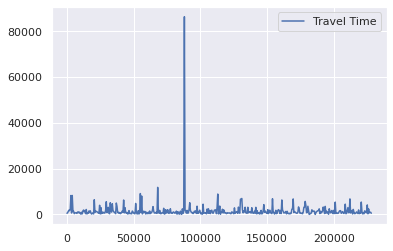

In [399]:
# plotting different travel time of different user
x = []
for i in range(len(difference_in_ride)):
  x.append(difference_in_ride[i].seconds)
for i in range(len(difference_in_ride)):
  difference_in_ride[i]=x[i]

y = [i for i in range(0,len(difference_in_ride),500)]
j=0
k = []
for i in range(0,len(difference_in_ride),500):
  if j < len(difference_in_ride):
    k.append(x[j]) 
    j = j+500
print(y)
print(k)

plt.plot(y, k, label='Travel Time')
plt.legend()
plt.show()

In [400]:
data['time_to_travel'] = difference_in_ride
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_to_travel
0,40166AEE48DB264F,docked_bike,2020-07-10 20:00:46,2020-07-10 20:09:42,Potomac Ave & Half St SW,570.0,4th & M St SW,21.0,38.870201,-77.010836,38.876700,-77.017800,casual,536
1,C2D80D65DEB2C464,docked_bike,2020-07-30 22:11:33,2020-07-30 23:32:05,Maine Ave & 9th St SW,548.0,Maine Ave & 9th St SW,548.0,38.880440,-77.025236,38.880440,-77.025236,casual,4832
10,7DF081081823B294,electric_bike,2020-07-20 16:05:43,2020-07-20 16:24:55,Columbia & Ontario Rd NW,517.0,14th St & Colorado Ave NW,90.0,38.924158,-77.040664,38.956422,-77.032982,casual,1152
11,6F354AFFFD216948,electric_bike,2020-07-19 20:24:04,2020-07-19 20:31:59,Georgia & Missouri Ave NW,414.0,Grant Circle,633.0,38.961336,-77.027898,38.942040,-77.018205,casual,475
12,CBFEDBCDC47745C8,electric_bike,2020-07-20 08:28:31,2020-07-20 09:09:34,Connecticut Ave & Yuma St NW,444.0,Connecticut Ave & Yuma St NW,444.0,38.947055,-77.065241,38.947070,-77.065110,casual,2463


In [401]:
#prune data with time to travel >= 120
data1 = data[data['time_to_travel'] >= 120]
data1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_to_travel
0,40166AEE48DB264F,docked_bike,2020-07-10 20:00:46,2020-07-10 20:09:42,Potomac Ave & Half St SW,570.0,4th & M St SW,21.0,38.870201,-77.010836,38.876700,-77.017800,casual,536
1,C2D80D65DEB2C464,docked_bike,2020-07-30 22:11:33,2020-07-30 23:32:05,Maine Ave & 9th St SW,548.0,Maine Ave & 9th St SW,548.0,38.880440,-77.025236,38.880440,-77.025236,casual,4832
10,7DF081081823B294,electric_bike,2020-07-20 16:05:43,2020-07-20 16:24:55,Columbia & Ontario Rd NW,517.0,14th St & Colorado Ave NW,90.0,38.924158,-77.040664,38.956422,-77.032982,casual,1152
11,6F354AFFFD216948,electric_bike,2020-07-19 20:24:04,2020-07-19 20:31:59,Georgia & Missouri Ave NW,414.0,Grant Circle,633.0,38.961336,-77.027898,38.942040,-77.018205,casual,475
12,CBFEDBCDC47745C8,electric_bike,2020-07-20 08:28:31,2020-07-20 09:09:34,Connecticut Ave & Yuma St NW,444.0,Connecticut Ave & Yuma St NW,444.0,38.947055,-77.065241,38.947070,-77.065110,casual,2463


In [402]:
# gives bike status and its corresponding status
free_bike_status = pd.read_csv("https://raw.githubusercontent.com/Akanksha0215/mywork/master/free_bike_status.csv") 
free_bike_status.head()

,data__bikes__type,data__bikes__bike_id,data__bikes__lat,data__bikes__rental_uris__android,data__bikes__rental_uris__ios,data__bikes__is_disabled,data__bikes__is_reserved,data__bikes__lon,data__bikes__name,last_updated,ttl
0,electric_bike,2aca07458f9283c67877dacd6088501a,38.919425,https://dc.lft.to/lastmile_qr_scan,https://dc.lft.to/lastmile_qr_scan,0,0,-77.041747,2aca07458f9283c67877dacd6088501a,1.599427e+09,5.0
1,electric_bike,c34779018b95a257521c34ea13f69a0f,39.040619,https://dc.lft.to/lastmile_qr_scan,https://dc.lft.to/lastmile_qr_scan,0,0,-77.050326,c34779018b95a257521c34ea13f69a0f,NaN,NaN
2,electric_bike,3ae93b6b7b996d51e3c566c0a4279f0f,38.914053,https://dc.lft.to/lastmile_qr_scan,https://dc.lft.to/lastmile_qr_scan,0,0,-76.974587,3ae93b6b7b996d51e3c566c0a4279f0f,NaN,NaN
3,electric_bike,b030e5dd3c17a093e01b0c64ca258d6a,39.083747,https://dc.lft.to/lastmile_qr_scan,https://dc.lft.to/lastmile_qr_scan,0,0,-77.151204,b030e5dd3c17a093e01b0c64ca258d6a,NaN,NaN
4,electric_bike,2531a4484ecd840fdbcbe3fc6685ef11,38.956336,https://dc.lft.to/lastmile_qr_scan,https://dc.lft.to/lastmile_qr_scan,0,0,-76.979038,2531a4484ecd840fdbcbe3fc6685ef11,NaN,NaN


In [403]:
#gives information about stations in the whole system
station_information = pd.read_csv("https://raw.githubusercontent.com/Akanksha0215/mywork/master/station_information.csv") 
station_information.head()


,data__stations__rental_methods__001,data__stations__rental_methods__002,data__stations__capacity,data__stations__station_id,data__stations__name,data__stations__electric_bike_surcharge_waiver,data__stations__region_id,data__stations__short_name,data__stations__legacy_id,data__stations__lat,data__stations__rental_uris__android,data__stations__rental_uris__ios,data__stations__eightd_has_key_dispenser,data__stations__lon,data__stations__external_id,data__stations__station_type,data__stations__has_kiosk,last_updated,ttl
0,KEY,CREDITCARD,15,1,Eads St & 15th St S,False,41.0,31000,1,38.858971,https://dc.lft.to/lastmile_qr_scan,https://dc.lft.to/lastmile_qr_scan,False,-77.053230,082469cc-1f3f-11e7-bf6b-3863bb334450,classic,True,1.599427e+09,5.0
1,KEY,CREDITCARD,11,2,18th St & S Eads St,False,41.0,31001,2,38.857250,https://dc.lft.to/lastmile_qr_scan,https://dc.lft.to/lastmile_qr_scan,False,-77.053320,08246b69-1f3f-11e7-bf6b-3863bb334450,classic,True,NaN,NaN
2,KEY,CREDITCARD,17,3,Crystal Dr & 20th St S,False,41.0,31002,3,38.856425,https://dc.lft.to/lastmile_qr_scan,https://dc.lft.to/lastmile_qr_scan,False,-77.049232,08246c35-1f3f-11e7-bf6b-3863bb334450,classic,True,NaN,NaN
3,KEY,CREDITCARD,11,4,Crystal Dr & 15th St S,False,41.0,31003,4,38.860170,https://dc.lft.to/lastmile_qr_scan,https://dc.lft.to/lastmile_qr_scan,False,-77.049593,08246cd5-1f3f-11e7-bf6b-3863bb334450,classic,True,NaN,NaN
4,KEY,CREDITCARD,11,5,Aurora Hills Cmty Ctr / 18th St & S Hayes St,False,41.0,31004,5,38.857866,https://dc.lft.to/lastmile_qr_scan,https://dc.lft.to/lastmile_qr_scan,False,-77.059490,08246d68-1f3f-11e7-bf6b-3863bb334450,classic,True,NaN,NaN


In [404]:
#produce station status and avaibility of bikes in it 

station_status = pd.read_csv("https://raw.githubusercontent.com/Akanksha0215/mywork/master/station_status.csv") 
station_status.head()

,data__stations__is_installed,data__stations__num_bikes_disabled,data__stations__is_returning,data__stations__station_status,data__stations__last_reported,data__stations__eightd_has_available_keys,data__stations__legacy_id,data__stations__num_ebikes_available,data__stations__is_renting,data__stations__num_docks_disabled,data__stations__num_docks_available,data__stations__num_bikes_available,data__stations__station_id,last_updated,ttl
0,1,1,1,active,1599426428,False,1,0,1,0,11,3,1,1.599427e+09,5.0
1,1,1,1,active,1599421244,False,2,0,1,0,9,1,2,NaN,NaN
2,1,0,1,active,1599424089,False,3,0,1,0,1,16,3,NaN,NaN
3,1,0,1,active,1599426176,False,4,0,1,0,8,3,4,NaN,NaN
4,1,0,1,active,1599424516,False,5,0,1,0,7,4,5,NaN,NaN


**Figure 1**

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Time Travelled(seconds)')]

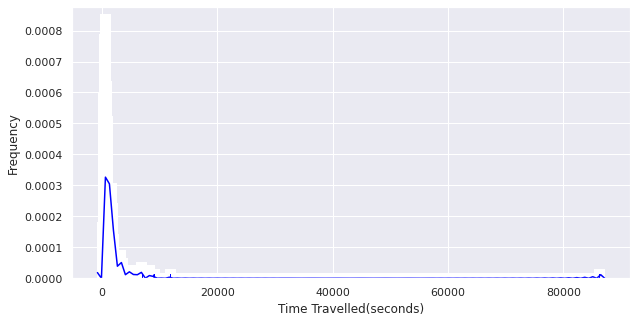

In [405]:
# PDF of time travel attributes
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,5)})
# settings for seaborn plotting style

# settings for seaborn plot sizes

ax = sns.distplot(k,
                  bins=500,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 10,'alpha':1})
ax.set(xlabel='Time Travelled(seconds)', ylabel='Frequency')

# Findings :- Frequency count of low time  travel is high and for high duration of time is very low

**TABLE 1**

In [406]:
data1.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_to_travel
0,40166AEE48DB264F,docked_bike,2020-07-10 20:00:46,2020-07-10 20:09:42,Potomac Ave & Half St SW,570.0,4th & M St SW,21.0,38.870201,-77.010836,38.8767,-77.0178,casual,536


**TABLE 2**

In [407]:
#system requirement and prerequisites
info = pd.read_csv("https://raw.githubusercontent.com/Akanksha0215/mywork/master/system_information.csv") 
info.head()

,data__language,data__system_id,data__timezone,data__operator,data__license_url,data__purchase_url,data__short_name,data__name,data__phone_number,data__start_date,data__url,data__email,last_updated,ttl
0,es,cabi,America/New_York,"Motivate International, Inc.",NaN,https://secure.capitalbikeshare.com/register/,Capital Bikeshare,Capital Bikeshare,1-877-430-BIKE,2010-09-20,http://www.capitalbikeshare.com,customerservice@capitalbikeshare.com,1599426730,5


**TABLE 3**

In [408]:
def count(li, l, r): 
    c = 0 
    for x in li: 
        if x>= l and x<= r: 
            c+= 1 
    return c 

l1 = [count(data1['time_to_travel'], 0, 500)]
av1 = round((float(l1[0]) / len(data1['time_to_travel'])) * 100, 2)
l1.append(av1)
print(l1)
l2 = [count(data1['time_to_travel'], 501, 1000)]
av2 = round((float(l2[0]) / len(data1['time_to_travel'])) * 100, 2)
l2.append(av2)
print(l2)
l3 = [count(data1['time_to_travel'], 1001, 5000)]
av3 = round((float(l3[0]) / len(data1['time_to_travel'])) * 100,2)
l3.append(av3)
print(l3)
l4 = [count(data1['time_to_travel'], 5001, 10000)]
av4 = round((float(l4[0]) / len(data1['time_to_travel'])) * 100,2)
l4.append(av4)
print(l4)
l5 = [count(data1['time_to_travel'], 8001, 10000)]
av5 = round((float(l5[0]) / len(data1['time_to_travel'])) * 100,2)
l5.append(av5)
print(l5)
l6 = [count(data1['time_to_travel'], 10001, 20000)]
av6 = round((float(l6[0]) / len(data1['time_to_travel'])) * 100,2)
l6.append(av6)
print(l6)
l7 = [count(data1['time_to_travel'], 20001, 30000)]
av7 = round((float(l7[0]) / len(data1['time_to_travel'])) * 100,2)
l7.append(av7)
print(l7)
l8 = [count(data1['time_to_travel'], 30001, 40000)]
av8 = round((float(l8[0]) / len(data1['time_to_travel'])) * 100,2)
l8.append(av8)
print(l8)


[48604, 22.4]
[65072, 29.99]
[92917, 42.83]
[7516, 3.46]
[1397, 0.64]
[1432, 0.66]
[147, 0.07]
[90, 0.04]


In [409]:
dc = {'0-500': l1, '501-1000': l2, '1001-5000': l3, '5001-10000' :l4, '10001-20000': l5, '20001-30000':l6, '30001-40000': l7, } 
df = pd.DataFrame(dc, index =['Counts', 'Percentage']) 
# the 0-500, 500-1000 etc is the range of time travelled by users in seconds   
df

,0-500,501-1000,1001-5000,5001-10000,10001-20000,20001-30000,30001-40000
Counts,48604.0,65072.00,92917.00,7516.00,1397.00,1432.00,147.00
Percentage,22.4,29.99,42.83,3.46,0.64,0.66,0.07


In [410]:
import calendar
v = pd.Series([i for i in range(len(data1))])
data1 = data1.reindex(v)
s = pd.to_datetime(data1['ended_at'])

print(s)
print(s[0].month)
print(s[0].year)
print(s[0].day)
print(s[1].weekday())
print(calendar.day_name[s[1].weekday()])
m1 = []
m2 = []
m3 = []
m4 = []
v=0
for k in range(len(s)):
  m1.append(s[k].month)
for k in range(len(s)):
  m2.append(s[k].year)
for k in range(len(s)):
  m3.append(s[k].day)
#for k in range(len(s)):
 # if s[k] is not None:
  #  m4.append(calendar.day_name[s[k].weekday()])
  #else :
   # m4.append([s[0].weekday()])


0        2020-07-10 20:09:42
1        2020-07-30 23:32:05
2                        NaT
3                        NaT
4                        NaT
                 ...        
216953   2020-07-23 18:18:21
216954   2020-07-07 20:02:44
216955   2020-07-11 15:39:11
216956   2020-07-15 13:23:13
216957   2020-07-05 14:44:59
Name: ended_at, Length: 216958, dtype: datetime64[ns]
7
2020
10
3
Thursday


In [411]:
data1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_to_travel
0,40166AEE48DB264F,docked_bike,2020-07-10 20:00:46,2020-07-10 20:09:42,Potomac Ave & Half St SW,570.0,4th & M St SW,21.0,38.870201,-77.010836,38.87670,-77.017800,casual,536
1,C2D80D65DEB2C464,docked_bike,2020-07-30 22:11:33,2020-07-30 23:32:05,Maine Ave & 9th St SW,548.0,Maine Ave & 9th St SW,548.0,38.880440,-77.025236,38.88044,-77.025236,casual,4832
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [412]:
dc = {'ride_id': data1['ride_id'], 'rideable_type': data1['rideable_type'], 'started_at': data1['started_at'], 'end_month' : m1, 'end_year':m2, 'end_day':m3, 'start_station_id': data1['start_station_id'], 'end_station_name': data1['end_station_name'], 'end_station_id': data1['end_station_id'], 'time_to_travel': data1['time_to_travel'] } 
df = pd.DataFrame(dc)
df 

,ride_id,rideable_type,started_at,end_month,end_year,end_day,start_station_id,end_station_name,end_station_id,time_to_travel
0,40166AEE48DB264F,docked_bike,2020-07-10 20:00:46,7.0,2020.0,10.0,570.0,4th & M St SW,21.0,536
1,C2D80D65DEB2C464,docked_bike,2020-07-30 22:11:33,7.0,2020.0,30.0,548.0,Maine Ave & 9th St SW,548.0,4832
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
216953,3B93FABBC4367C4A,docked_bike,2020-07-23 18:12:48,7.0,2020.0,23.0,440.0,Adams Mill & Columbia Rd NW,17.0,333
216954,8F545743472BD67C,docked_bike,2020-07-07 19:46:57,7.0,2020.0,7.0,173.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,169.0,947
216955,FC057CBC640E90AD,docked_bike,2020-07-11 15:27:23,7.0,2020.0,11.0,277.0,8th & D St NW,303.0,708
216956,7A766336D2E52BCD,docked_bike,2020-07-15 13:12:41,7.0,2020.0,15.0,599.0,18th St & Wyoming Ave NW,76.0,632


In [413]:
s1 = df.query('end_station_id == 200')
s1 = s1.sort_values(by=['end_day'])
s1.head()

,ride_id,rideable_type,started_at,end_month,end_year,end_day,start_station_id,end_station_name,end_station_id,time_to_travel
173262,EE8AFF53D632528B,docked_bike,2020-07-01 12:54:05,7.0,2020.0,1.0,200.0,Virginia Square Metro / Monroe St & 9th St N,200.0,1344
86401,6079516A52DAB5E5,docked_bike,2020-07-01 14:24:48,7.0,2020.0,1.0,252.0,Virginia Square Metro / Monroe St & 9th St N,200.0,802
72047,9EF942A1BAF5A72A,docked_bike,2020-07-01 19:06:21,7.0,2020.0,1.0,216.0,Virginia Square Metro / Monroe St & 9th St N,200.0,5497
138954,AC1DFA457C53AA82,docked_bike,2020-07-01 21:29:46,7.0,2020.0,1.0,216.0,Virginia Square Metro / Monroe St & 9th St N,200.0,141
36351,96BFA1B8A82F28D0,docked_bike,2020-07-02 15:37:44,7.0,2020.0,2.0,249.0,Virginia Square Metro / Monroe St & 9th St N,200.0,685


In [414]:
s3 =s1.groupby(["end_day", "end_month","end_year"])
print(s3)

In [415]:
s3 =s1.groupby(["end_day", "end_month","end_year"]).size()
s3 = pd.DataFrame(s3,columns=['count'])
modified = s3.reset_index()
modified

,end_day,end_month,end_year,count
0,1.0,7.0,2020.0,4
1,2.0,7.0,2020.0,10
2,3.0,7.0,2020.0,15
3,4.0,7.0,2020.0,12
4,5.0,7.0,2020.0,10
5,6.0,7.0,2020.0,10
6,7.0,7.0,2020.0,4
7,8.0,7.0,2020.0,4
8,9.0,7.0,2020.0,6
9,10.0,7.0,2020.0,8
